<a href="https://colab.research.google.com/github/thilina-xoxo/ml_tf/blob/master/Copy_of_Copy_of_Mini_project_part_2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ANN vs CNN

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('x_train' + str(train_x.shape))
print('x_test' + str(test_x.shape))
print('y_train' + str(train_x.shape))
print('y_test' + str(test_y.shape))

x_train(60000, 28, 28)
x_test(10000, 28, 28)
y_train(60000, 28, 28)
y_test(10000,)


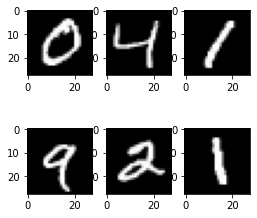

In [ ]:
# draw sample data

import matplotlib.pyplot as plt

w=10
h=10

fig = plt.figure(figsize=(4,4))
columns = 3
rows =2

for i in range(1,columns*rows+1):
  fig.add_subplot(rows,columns,i)
  plt.imshow(train_x[i],cmap=plt.get_cmap('gray'))
plt.show()

##Deep Neural Network without convolution layers

In [ ]:
# convert train data into one hot format
from tensorflow.keras.utils import to_categorical

In [ ]:
# convert train labels in to one hot format
temp = []

for i in range(len(train_y)):
  temp.append(to_categorical(train_y[i],num_classes=10))

y_train = np.array(temp)

In [ ]:
# convert test labels in to one hot format
temp = []

for i in range(len(test_y)):
  temp.append(to_categorical(test_y[i],num_classes=10))

y_test = np.array(temp)

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

# create neural network
model_ann = Sequential()
model_ann.add(Flatten(input_shape=(28,28)))
model_ann.add(Dense(5, activation='sigmoid'))
model_ann.add(Dense(10, activation='softmax'))


model_ann.summary()

model_ann.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model_ann.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

In [ ]:
#train neural network
model_ann.fit(train_x, y_train, epochs=50, validation_data=(test_x,y_test))

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6042 - acc: 0.5392 - val_loss: 1.1910 - val_acc: 0.6691
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0788 - acc: 0.6681 - val_loss: 0.9516 - val_acc: 0.6941
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9158 - acc: 0.7017 - val_loss: 0.8588 - val_acc: 0.7335
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8521 - acc: 0.7279 - val_loss: 0.8121 - val_acc: 0.7459
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8112 - acc: 0.7578 - val_loss: 0.8220 - val_acc: 0.7485
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7853 - acc: 0.7637 - val_loss: 0.7817 - val_acc: 0.7692
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7890 - acc: 0.7611 - val_loss: 0.7757 - val_acc: 0.7688
Epoch 8/50
1875/1875 [==============================] - 3s 2ms

In [ ]:
# Making predictions using our trained model
predictions_ann = model_ann.predict(test_x)
predictions_ann = np.argmax(predictions_ann, axis=1)
predictions_ann

array([7, 2, 1, ..., 4, 8, 6])

In [ ]:
test_x.shape

(10000, 28, 28)

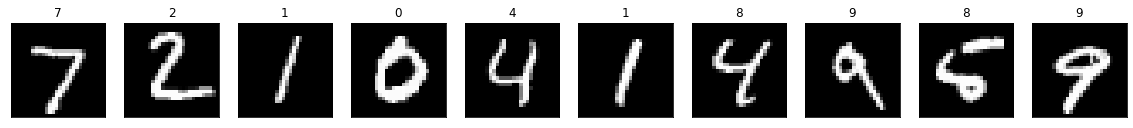

In [ ]:
# Display predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions_ann[i])
	axes[i].imshow(test_x[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

##CNN 

In [ ]:
#load data set again

(train_x,train_y),(test_x,test_y) = mnist.load_data()

In [ ]:
# scale the data set
x_train = train_x / 255
x_test = test_x / 255

In [ ]:
# convert 2-d matrix into 1-d array
x_train = x_train.reshape(-1,28,28,1)  
x_test = x_test.reshape(-1,28,28,1) 

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
from tensorflow.keras import layers,models
from tensorflow import keras

In [ ]:
# create and training the CNN
convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
convolutional_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutional_neural_network.fit(x_train, train_y, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2371 - accuracy: 0.9251
Epoch 2/3
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0810 - accuracy: 0.9747
Epoch 3/3
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0576 - accuracy: 0.9821


In [ ]:
# Make predictions

# Making predictions using our trained model
predictions_cnn = convolutional_neural_network.predict(test_x)
predictions_cnn = np.argmax(predictions_cnn, axis=1)
predictions_cnn

array([7, 2, 1, ..., 4, 5, 6])

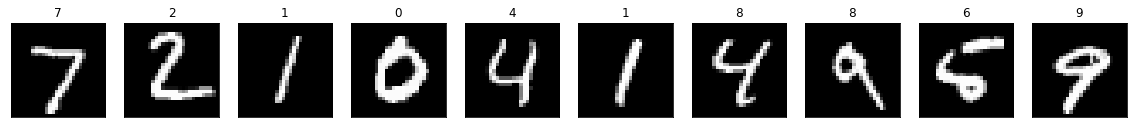

In [ ]:
# Display predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions_cnn[i])
	axes[i].imshow(test_x[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

##iii) Check predictions of unknown data with both models
data set - https://didadataset.github.io/DIDA/

This data set contain historical hand written digits which is unseen data for both of the above models

In [ ]:
import cv2 # import open cv

im = cv2.imread("/content/drive/MyDrive/test/testimagedata/2image.jpg") # zero digit
grayImage = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
grayImage.shape

(480, 852)

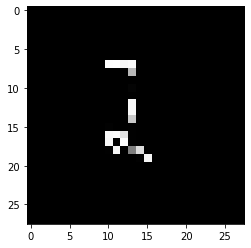

In [ ]:
# reshape image into mnist shape


resized_image = cv2.resize(grayImage,(28,28))
plt.imshow(resized_image,cmap='Greys')

In [ ]:
arr = np.array(resized_image)
arr = arr.reshape(1, 28, 28, 1)

In [ ]:
predict_cnn_6 = convolutional_neural_network.predict(arr)


In [ ]:
np.argmax(predict_cnn_6)

0

In [ ]:
# create function to predict output in ann and cnn model for custom image
def predict_image (path,model,convolutional_neural_network):
  im = cv2.imread(path)
  grayImage = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  resized_image = cv2.resize(grayImage,(28,28))
  plt.imshow(resized_image,cmap='Greys') # plot the image
  arr = np.array(resized_image)
  arr = arr.reshape(1, 28, 28, 1)
  predict_cnn = convolutional_neural_network.predict(arr)
  predict_ann = model.predict(arr) 
  print("Prediction of ann model :" + str(np.argmax(predict_cnn)))
  print("Prediction of cnn model :"+str(np.argmax(predict_ann)))

Prediction of ann model :0
Prediction of cnn model :3


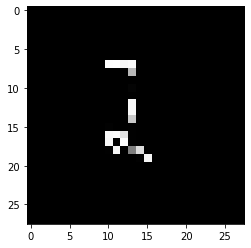

In [ ]:
path_2 ='/content/drive/MyDrive/test/testimagedata/2image.jpg'
predict_image(path_2,model_ann,convolutional_neural_network)

Prediction of ann model :0
Prediction of cnn model :3


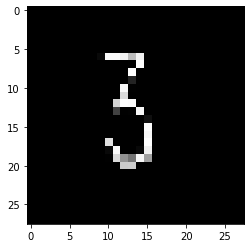

In [ ]:
path_3 = '/content/drive/MyDrive/test/testimagedata/3image.jpg'
predict_image(path_3,model_ann,convolutional_neural_network)

Prediction of ann model :8
Prediction of cnn model :3


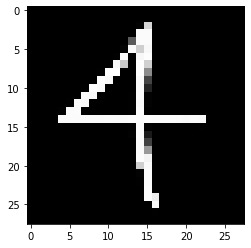

In [ ]:
path_4 = '/content/drive/MyDrive/test/testimagedata/4image.jpg'
predict_image(path_4,model_ann,convolutional_neural_network)

Prediction of ann model :0
Prediction of cnn model :3


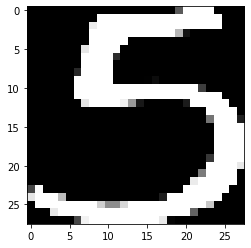

In [ ]:
path_5 = '/content/drive/MyDrive/test/testimagedata/5 image.png'
predict_image(path_5,model_ann,convolutional_neural_network)

Prediction of ann model :0
Prediction of cnn model :3


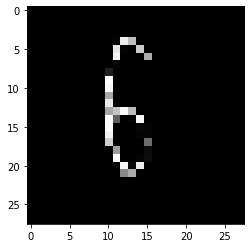

In [ ]:
path_6 = '/content/drive/MyDrive/test/testimagedata/6image.jpg'
predict_image(path_6,model_ann,convolutional_neural_network)

Prediction of ann model :0
Prediction of cnn model :3


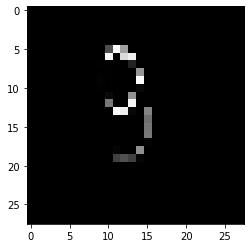

In [ ]:
path_9 = '/content/drive/MyDrive/test/testimagedata/9image.jpg'
predict_image(path_9,model_ann,convolutional_neural_network)